# Figure 4: Novelty Effect

In [1]:
source('../scripts/load_libraries.R')
source('../scripts/load_constants.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘lemon’


The following objects are masked from ‘package:ggplot2’:

    CoordCartesian, element_render




In [2]:
source('../scripts/load_data.R')

Rows: 17264341 Columns: 5
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): comment_id, user_id, author_id, anonymous, first_view

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1281001 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): comment_id, user_id, score, time_stamp

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 223737 Columns: 4
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): comment_id, user_id, num, time_stamp

ℹ Use `spec()` t

In [5]:
up_ym <- df_clean %>%
  mutate(yr = year(ds), mn = month(ds)) %>%
  group_by(yr, mn) %>% do({
    cat('.')
    m <- felm(up ~ identified | user_id + author_id | 0 | user_id + author_id,
              data = .)
    broom::tidy(m)
  })

......................

In [3]:
dn_ym <- df_clean %>%
  mutate(yr = year(ds), mn = month(ds)) %>%
  group_by(yr, mn) %>% do({
    m <- felm(dn ~ identified | user_id + author_id | 0 | user_id + author_id,
              data = .)
    broom::tidy(m)
  })

In [4]:
rp_ym <- df_clean %>%
  mutate(rp = as.numeric(rp > 0),
         yr = year(ds), mn = month(ds)) %>%
  group_by(yr, mn) %>% do({
    m <- felm(rp ~ identified | user_id + author_id | 0 | user_id + author_id,
              data = .)
    broom::tidy(m)
  })

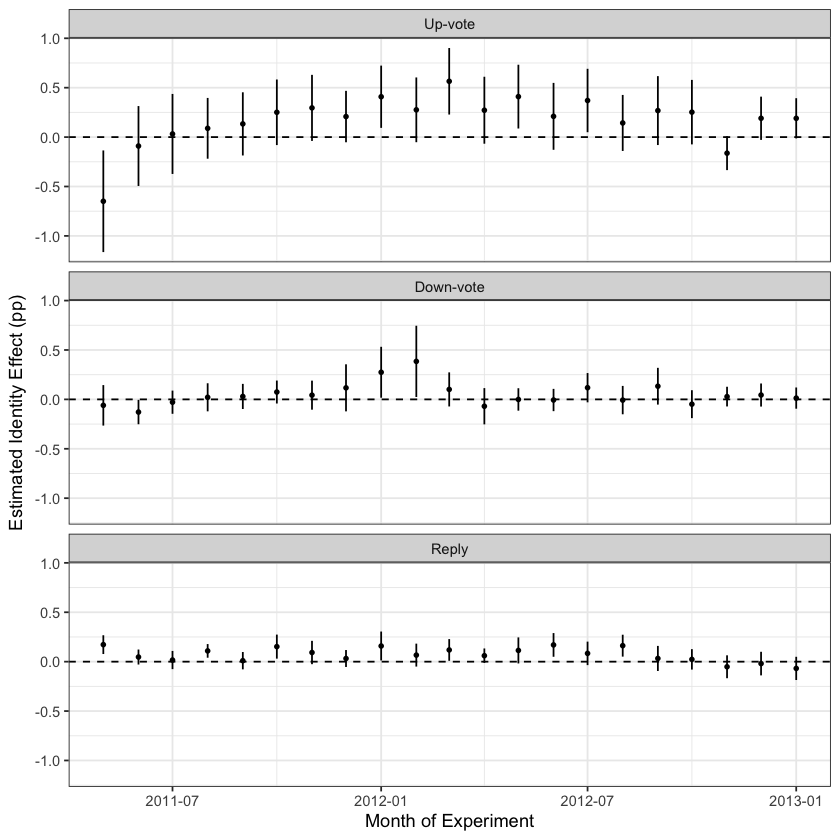

In [6]:
p1 <- bind_rows(up_ym %>% mutate(outcome = 'up'),
                dn_ym %>% mutate(outcome = 'dn'),
                rp_ym %>% mutate(outcome = 'rp')) %>%
  mutate(outcome = fct_relevel(outcome, 'up', 'dn', 'rp'),
         outcome = fct_recode(outcome, `Up-vote` = 'up', `Down-vote` = 'dn', `Reply` = 'rp')) %>%
  filter(term == 'identified') %>%
  mutate(ds = ymd(10000 * yr + 100 * mn + 1),
         estimate = 100 * estimate,
         se = 100 * std.error) %>%
  filter(ds <= '2013-01-01') %>%
  ggplot(aes(x = ds, y = estimate,
             ymin = estimate - 1.96 * se,
             ymax = estimate + 1.96 * se)) +
  geom_pointrange(fatten=0.5) +
  geom_hline(yintercept = 0.0, linetype = 'dashed') +
  facet_wrap(~outcome, ncol = 1) +
  xlab('Month of Experiment') +
  ylab('Estimated Identity Effect (pp)') +
  theme_bw()
p1

In [7]:
ggsave('../figures/fig-4.pdf', p1, width = 5.5, height = 5)